study time
health
absences
higher
number of past class failures
internet
schoolsup
paid


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import shutil

class customEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:  
            print(f"Epoch: {epoch + 1}/{500}, Accuracy: {logs['accuracy']:.4f}, Loss: {logs['loss']:.4f}")

            
def create_model(target):
    print(f'For Target {target}:')
    stpd[target] = stpd[target].apply(lambda x: 0 if x < 10 else 1)

    X, Y = stpd.drop(columns=['G1', 'G2', 'G3']), stpd[target].values.reshape(-1, 1)


    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=42)

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(8,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))  

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5)) 

    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, Y_train, epochs=500, verbose=0, callbacks=[customEpoch()])
    
    accuracies(X_train, Y_train, X_test, Y_test, model)
    print('\n')
    return model


def accuracies(X_train, Y_train, X_test, Y_test, model):
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

    y_prob = model.predict(X_test, verbose=0)
    Y_pred = (y_prob > 0.5).astype(int) 

    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    mse = mean_squared_error(Y_test, Y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")     
    
  

original_file = 'student-por.csv'
backup_file = 'student-por0copy.csv'

shutil.copyfile(original_file, backup_file)

stpd = pd.read_csv('student-por0copy.csv', delimiter = ";")

stpd = stpd[['studytime', 'health', 'absences', 'higher', 'failures', 'internet', 'schoolsup', 'paid', 'G1', 'G2', 'G3']]


stpd['higher'] = stpd['higher'].map({'yes': 1, 'no': 0})
stpd['internet'] = stpd['internet'].map({'yes': 1, 'no': 0})
stpd['schoolsup'] = stpd['schoolsup'].map({'yes': 1, 'no': 0})
stpd['paid'] = stpd['paid'].map({'yes': 1, 'no': 0})


create_model('G1')
create_model('G2')
create_model('G3')


pearsoncorr = stpd.corr(method='pearson')
pearsoncorr

For Target G1:
Epoch: 50/500, Accuracy: 0.7979, Loss: 0.4738
Epoch: 100/500, Accuracy: 0.7808, Loss: 0.4599
Epoch: 150/500, Accuracy: 0.8185, Loss: 0.4350
Epoch: 200/500, Accuracy: 0.8031, Loss: 0.4661
Epoch: 250/500, Accuracy: 0.8134, Loss: 0.4501
Epoch: 300/500, Accuracy: 0.8099, Loss: 0.4527
Epoch: 350/500, Accuracy: 0.8236, Loss: 0.4371
Epoch: 400/500, Accuracy: 0.8168, Loss: 0.4381
Epoch: 450/500, Accuracy: 0.8116, Loss: 0.4440
Epoch: 500/500, Accuracy: 0.8253, Loss: 0.4425
Test Accuracy: 0.8769, Test Loss: 0.3224
Confusion Matrix:
 [[ 6  3]
 [ 5 51]]
Accuracy: 0.8769
Mean Squared Error: 0.1231
Precision: 0.9444
Recall: 0.9107


For Target G2:
Epoch: 50/500, Accuracy: 0.7894, Loss: 0.4978
Epoch: 100/500, Accuracy: 0.7757, Loss: 0.5071
Epoch: 150/500, Accuracy: 0.7894, Loss: 0.4719
Epoch: 200/500, Accuracy: 0.7825, Loss: 0.4761
Epoch: 250/500, Accuracy: 0.8014, Loss: 0.4559
Epoch: 300/500, Accuracy: 0.7825, Loss: 0.4630
Epoch: 350/500, Accuracy: 0.7997, Loss: 0.4533
Epoch: 400/500,

,studytime,health,absences,higher,failures,internet,schoolsup,paid,G1,G2,G3
studytime,1.000000,-0.056433,-0.118389,0.188256,-0.147441,0.037529,0.089316,-0.002314,0.239245,0.160423,0.165111
health,-0.056433,1.000000,-0.030235,0.017290,0.035588,-0.022792,0.022760,0.063203,0.007930,-0.023676,-0.009979
absences,-0.118389,-0.030235,1.000000,-0.129891,0.122779,0.067301,-0.059503,-0.035959,-0.117522,-0.122350,-0.087483
higher,0.188256,0.017290,-0.129891,1.000000,-0.309400,0.070345,0.085355,0.024112,0.400471,0.319027,0.309708
failures,-0.147441,0.035588,0.122779,-0.309400,1.000000,-0.095330,-0.000745,0.069416,-0.425888,-0.417026,-0.380237
internet,0.037529,-0.022792,0.067301,0.070345,-0.095330,1.000000,-0.025942,0.031823,0.123232,0.098609,0.088215
schoolsup,0.089316,0.022760,-0.059503,0.085355,-0.000745,-0.025942,1.000000,0.040512,-0.018211,0.014405,0.034527
paid,-0.002314,0.063203,-0.035959,0.024112,0.069416,0.031823,0.040512,1.000000,-0.038840,-0.020026,-0.053708
G1,0.239245,0.007930,-0.117522,0.400471,-0.425888,0.123232,-0.018211,-0.038840,1.000000,0.621270,0.635928
G2,0.160423,-0.023676,-0.122350,0.319027,-0.417026,0.098609,0.014405,-0.020026,0.621270,1.000000,0.682985


In [41]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import shutil

class customEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:  
            print(f"Epoch: {epoch + 1}/{500}, Accuracy: {logs['accuracy']:.4f}, Loss: {logs['loss']:.4f}")

def create_model(X_train):
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=0.05)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
            
def true_model(target):
    print(f'For Target {target}:')
    stpd[target] = stpd[target].apply(lambda x: 0 if x < 10 else 1)

    x, y = stpd.drop(columns=['G1', 'G2', 'G3']), stpd[target].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)

    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

    model = create_model(x_train)

    model.fit(x_train, y_train, epochs=500, verbose=0, callbacks=[customEpoch()])

    accuracies(x_train, y_train, x_test, y_test, model)

    drop_column(x, y, target)

    print('\n')
    return model


def accuracies(x_train, y_train, x_test, y_test, model):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

    y_prob = model.predict(x_test, verbose=0)
    y_pred = (y_prob > 0.5).astype(int)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    
    
def drop_column(x, y, target):
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

    model = create_model(x_train)

    model.fit(x_train, y_train, epochs=200, verbose=0)

    accuracies_list = {}
    
# check baseline, does not work
    baseline_accuracy = model.evaluate(x_test, y_test, verbose=0)[1] #works
    for i, col in enumerate(x.columns):
        
        
# do this later 
        x_drop = x.drop(columns=[col])
        x_scaled_drop = scaler.fit_transform(x_drop)

        x_train_drop, x_test_drop, y_train_drop, y_test_drop = train_test_split(x_scaled_drop, y, test_size=0.1, random_state=42)
        
        model = create_model(x_train_drop)

        model.fit(x_train_drop, y_train_drop, epochs=200, verbose=0)
        droppedlol = model.evaluate(x_test_drop, y_test_drop, verbose=0)[1]


        accuracy_drop = baseline_accuracy - droppedlol
        accuracies_list[col] = accuracy_drop

#issue with importance list, check later
    importance = sorted(accuracies_list.items(), key=lambda item: item[1], reverse=True) #works
    print("Drop Column/Feature Importance (Drop in Accuracy):")
    for feature, drop in importance:
        print(f"{feature} had a drop of: {drop:.4f}")

        
        
original_file = 'student-por.csv'
backup_file = 'student-por0copy.csv'
shutil.copyfile(original_file, backup_file)

stpd = pd.read_csv('student-por0copy.csv', delimiter=";")
stpd = stpd[['studytime', 'health', 'absences', 'higher', 'failures', 'internet', 'schoolsup', 'paid', 'G1', 'G2', 'G3']]

stpd['higher'] = stpd['higher'].map({'yes': 1, 'no': 0})
stpd['internet'] = stpd['internet'].map({'yes': 1, 'no': 0})
stpd['schoolsup'] = stpd['schoolsup'].map({'yes': 1, 'no': 0})
stpd['paid'] = stpd['paid'].map({'yes': 1, 'no': 0})

true_model('G1')
true_model('G2')
true_model('G3')


For Target G1:
Epoch: 50/500, Accuracy: 0.7877, Loss: 0.4766
Epoch: 100/500, Accuracy: 0.7928, Loss: 0.4735
Epoch: 150/500, Accuracy: 0.8065, Loss: 0.4596
Epoch: 200/500, Accuracy: 0.8185, Loss: 0.4409
Epoch: 250/500, Accuracy: 0.8219, Loss: 0.4415
Epoch: 300/500, Accuracy: 0.8151, Loss: 0.4473
Epoch: 350/500, Accuracy: 0.8168, Loss: 0.4409
Epoch: 400/500, Accuracy: 0.8185, Loss: 0.4418
Epoch: 450/500, Accuracy: 0.8134, Loss: 0.4380
Epoch: 500/500, Accuracy: 0.8065, Loss: 0.4362
Test Accuracy: 0.8615, Test Loss: 0.3446
Confusion Matrix:
 [[ 5  4]
 [ 5 51]]
Accuracy: 0.8615
Mean Squared Error: 0.1385
Precision: 0.9273
Recall: 0.9107
Baseline Accuracy for G1: 0.8769
Feature Importance (Accuracy Drop):
higher: 0.0308
studytime: 0.0154
health: 0.0154
absences: 0.0154
internet: 0.0154
schoolsup: 0.0154
paid: -0.0154
failures: -0.0308


For Target G2:
Epoch: 50/500, Accuracy: 0.7740, Loss: 0.5071
Epoch: 100/500, Accuracy: 0.7928, Loss: 0.4808
Epoch: 150/500, Accuracy: 0.7979, Loss: 0.4659
Ep

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, recall_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import shutil

#personal custom epoch printing
class customEpoch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 50 == 0:  
            print(f"Epoch: {epoch + 1}/{500}, Accuracy: {logs['accuracy']:.4f}, Loss: {logs['loss']:.4f}")
            
#create the function for easier modeling - soon
# retracing occurs- why? Search later
def create_model(x_train):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
            
def true_model(target):
    print(f'For Target {target}:')
    stpd[target] = stpd[target].apply(lambda x: 0 if x < 10 else 1)

    x, y = stpd.drop(columns=['G1', 'G2', 'G3']), stpd[target].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)
    
    model = create_model(x_train)
    model.fit(x_train, y_train, epochs=500, verbose=0, callbacks=[customEpoch()])

    accuracies(x_train, y_train, x_test, y_test, model)

    drop_column(x, y, target)

    print('\n')
    return model


def accuracies(x_train, y_train, x_test, y_test, model):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

    y_prob = model.predict(x_test, verbose=0)
    y_pred = (y_prob > 0.5).astype(int)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

#slow run time, possibly search for better techniques  
def drop_column(x, y, target):
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=42)

    model = create_model(x_train)
    model.fit(x_train, y_train, epochs=200, verbose=0)

#baseline doesnt work, why? 09/04
    baseline_accuracy = model.evaluate(x_test, y_test, verbose=0)[1] #works

    accuracies_list = {}
    
    
#fix later - ValueError in loop 09/04
    for col in x.columns:
        x_drop = x.drop(columns=[col])
        x_scaled_drop = scaler.fit_transform(x_drop)

        x_train_drop, x_test_drop, y_train_drop, y_test_drop = train_test_split(x_scaled_drop, y, test_size=0.1, random_state=42)
        
        model = create_model(x_train_drop)
        model.fit(x_train_drop, y_train_drop, epochs=200, verbose=0)

        droppedlol = model.evaluate(x_test_drop, y_test_drop, verbose=0)[1]

        accuracy_drop = baseline_accuracy - droppedlol
        accuracies_list[col] = accuracy_drop 

#the list does not work, check later 09/04
    importance = sorted(accuracies_list.items(), key=lambda item: item[1], reverse=True) #works now 09/08
    print("Drop Column/Feature Importance (Drop in Accuracy):")
    for feature, drop in importance:
        print(f"{feature} had a drop of: {drop:.4f}")
        
        

    


original = 'student-por.csv'
backup = 'student-por0copy.csv'
shutil.copyfile(original, backup)

stpd = pd.read_csv('student-por0copy.csv', delimiter=";")
stpd = stpd[['studytime', 'health', 'absences', 'higher', 'failures', 'internet', 'schoolsup', 'paid', 'G1', 'G2', 'G3']]

stpd['higher'] = stpd['higher'].map({'yes': 1, 'no': 0})
stpd['internet'] = stpd['internet'].map({'yes': 1, 'no': 0})
stpd['schoolsup'] = stpd['schoolsup'].map({'yes': 1, 'no': 0})
stpd['paid'] = stpd['paid'].map({'yes': 1, 'no': 0})

pear = stpd.corr(method='pearson')
display(pear)

true_model('G1')
true_model('G2')
true_model('G3')


,studytime,health,absences,higher,failures,internet,schoolsup,paid,G1,G2,G3
studytime,1.000000,-0.056433,-0.118389,0.188256,-0.147441,0.037529,0.089316,-0.002314,0.260875,0.240498,0.249789
health,-0.056433,1.000000,-0.030235,0.017290,0.035588,-0.022792,0.022760,0.063203,-0.051647,-0.082179,-0.098851
absences,-0.118389,-0.030235,1.000000,-0.129891,0.122779,0.067301,-0.059503,-0.035959,-0.147149,-0.124745,-0.091379
higher,0.188256,0.017290,-0.129891,1.000000,-0.309400,0.070345,0.085355,0.024112,0.349030,0.331953,0.332172
failures,-0.147441,0.035588,0.122779,-0.309400,1.000000,-0.095330,-0.000745,0.069416,-0.384210,-0.385782,-0.393316
internet,0.037529,-0.022792,0.067301,0.070345,-0.095330,1.000000,-0.025942,0.031823,0.139931,0.147909,0.150025
schoolsup,0.089316,0.022760,-0.059503,0.085355,-0.000745,-0.025942,1.000000,0.040512,-0.071779,-0.056624,-0.066405
paid,-0.002314,0.063203,-0.035959,0.024112,0.069416,0.031823,0.040512,1.000000,-0.062784,-0.033925,-0.054898
G1,0.260875,-0.051647,-0.147149,0.349030,-0.384210,0.139931,-0.071779,-0.062784,1.000000,0.864982,0.826387
G2,0.240498,-0.082179,-0.124745,0.331953,-0.385782,0.147909,-0.056624,-0.033925,0.864982,1.000000,0.918548


For Target G1:
Epoch: 50/500, Accuracy: 0.7842, Loss: 0.4783
Epoch: 100/500, Accuracy: 0.7860, Loss: 0.4818
Epoch: 150/500, Accuracy: 0.7962, Loss: 0.4651
Epoch: 200/500, Accuracy: 0.8151, Loss: 0.4452
Epoch: 250/500, Accuracy: 0.8134, Loss: 0.4466
Epoch: 300/500, Accuracy: 0.8134, Loss: 0.4451
Epoch: 350/500, Accuracy: 0.7997, Loss: 0.4558
Epoch: 400/500, Accuracy: 0.8151, Loss: 0.4309
Epoch: 450/500, Accuracy: 0.8065, Loss: 0.4503
Epoch: 500/500, Accuracy: 0.8185, Loss: 0.4507
Test Accuracy: 0.8615, Test Loss: 0.3283
Confusion Matrix:
 [[ 5  4]
 [ 5 51]]
Accuracy: 0.8615
Mean Squared Error: 0.1385
Precision: 0.9273
Recall: 0.9107
Drop Column/Feature Importance (Drop in Accuracy):
higher had a drop of: 0.0462
studytime had a drop of: 0.0308
absences had a drop of: 0.0308
health had a drop of: 0.0154
internet had a drop of: 0.0154
failures had a drop of: 0.0000
paid had a drop of: 0.0000
schoolsup had a drop of: -0.0154


For Target G2:
Epoch: 50/500, Accuracy: 0.7911, Loss: 0.4716
Epo

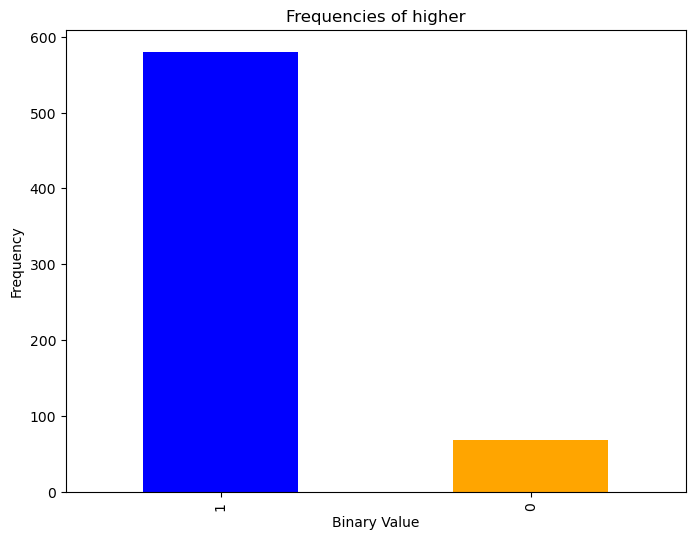

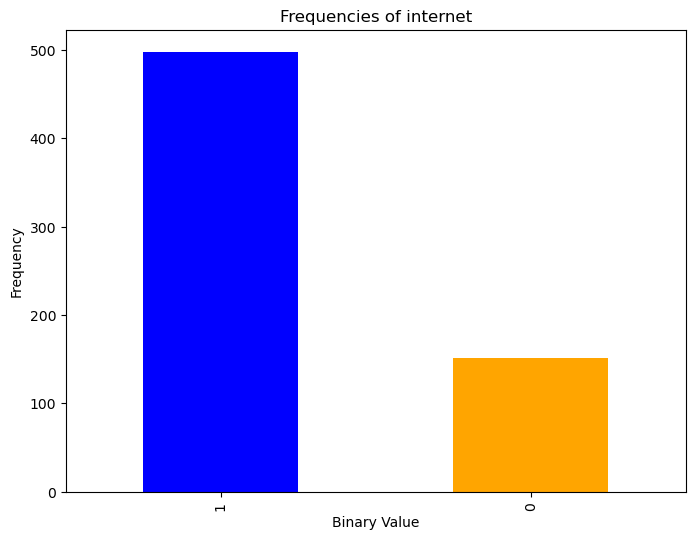

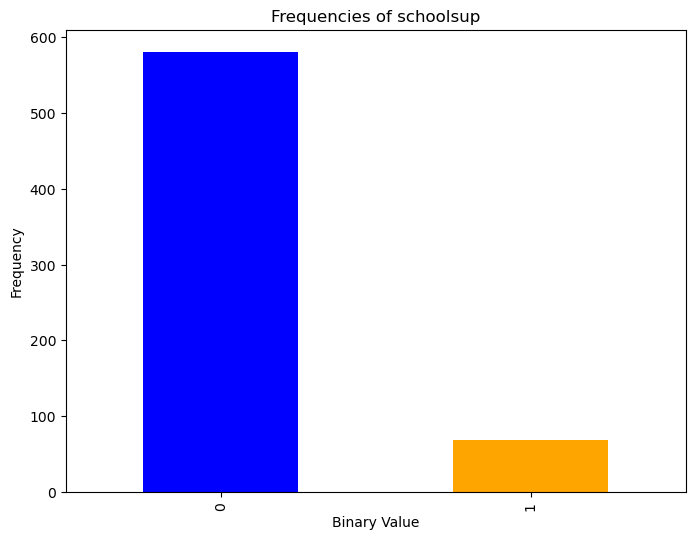

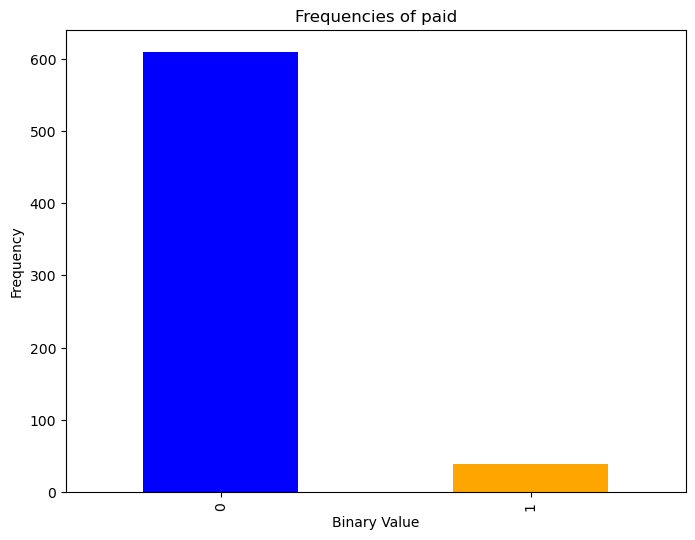

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

original = 'student-por.csv'
backup = 'student-por0copy.csv'
shutil.copyfile(original, backup)

stpd = pd.read_csv('student-por0copy.csv', delimiter=";")
stpd = stpd[['studytime', 'health', 'absences', 'higher', 'failures', 'internet', 'schoolsup', 'paid', 'G1', 'G2', 'G3']]

stpd['higher'] = stpd['higher'].map({'yes': 1, 'no': 0})
stpd['internet'] = stpd['internet'].map({'yes': 1, 'no': 0})
stpd['schoolsup'] = stpd['schoolsup'].map({'yes': 1, 'no': 0})
stpd['paid'] = stpd['paid'].map({'yes': 1, 'no': 0})

binary_columns = ['higher', 'internet', 'schoolsup', 'paid']  # Replace with your actual column names

for col in binary_columns:
    frequenc = ystpd[col].value_counts()

    plt.figure(figsize=(8, 6))
    frequency.plot(kind='bar', color=['blue', 'orange'])

    plt.title(f'Frequencies of {column}')
    plt.xlabel('Binary Value')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()
